<a href="https://colab.research.google.com/github/siwookim1114/Data-Science-Projects/blob/main/Iris_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Iris Data Set Analysis

## Import Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.tree import plot_tree

## Read Data

In [ ]:
file_path = "/content/drive/MyDrive/ML AI/Mega/데이터분석/데이터/iris_dataset.csv"
df_iris = pd.read_csv(file_path)

# Print Data Frame
df_iris

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),label
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


## Data Preprocessing

### Handling Missing Values

In [ ]:
# Check the number of missing values for each column
num_nulls = df_iris.isnull().sum()
print(f"Missing (NA) values for each column:\n{num_nulls}")

Missing (NA) values for each column:
sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
label                0
dtype: int64


Result : No missing values for each column

### Handling Outliers
* To check for outliers --> Use boxplot
* Four columns shows the same data characteristics (units, decimals, traits) => Apply visualization on the same grid



<Axes: >

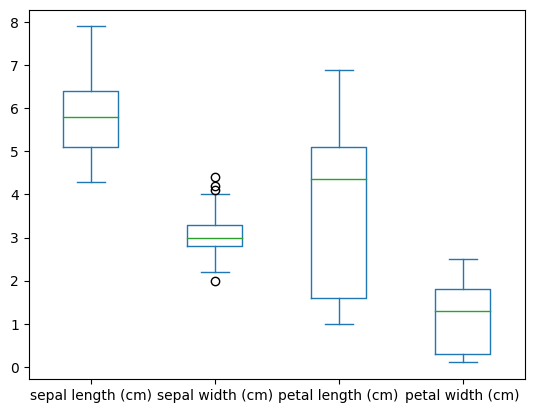

In [ ]:
df_iris.plot(kind = "box")

As the problem will use modeling of classification, outliers are not mandatory to be removed as if it was regression.

## Data Analysis / Visualization

### Distribution of Iris types
* First check the distribution and the counts for each Iris labels

Counts for each Iris dataset:
label
setosa        50
versicolor    50
virginica     50
Name: count, dtype: int64
--------------------------------------------------------------------------------


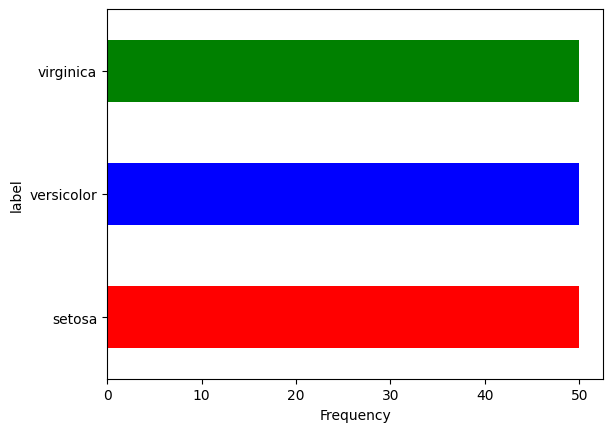

In [ ]:
# Counts for each Iris dataset
counts = df_iris.loc[:, "label"].value_counts()
print(f"Counts for each Iris dataset:\n{counts}")

print("-" * 80)
# Visualization
counts.plot(kind = "barh", color = ["red", "blue", "green"])
plt.xlabel("Frequency")
plt.show()

In [ ]:
### Retrieve the name of the columns for the data frame
names = df_iris.columns
print(f"Column names: \n{names}")

Column names: 
Index(['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)',
       'petal width (cm)', 'label'],
      dtype='object')


#### Relationship of Sepal Length and Iris Type


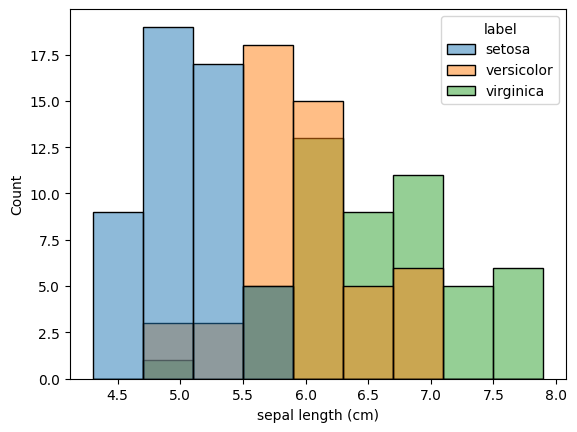

In [ ]:
# Sepal length is continuous data -> Use histogram graph for visualization
## Add a hue = "label" parameter to see the iris type label distribution
sns.histplot(data = df_iris, x = names[0], hue = "label")
plt.show()

Observation: Although it is hard to classify the types by only using sepal length, it could be seen that the trend that follows data with small sepal length is more classified as setosa, next versicolor, and the longest length as virginica.

#### Relationship of Sepal Width and Iris Type

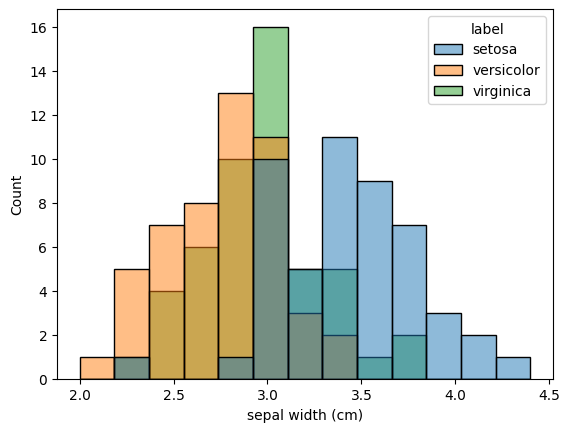

In [ ]:
# Sepal width is continuous data -> Use histogram graph for visualization
sns.histplot(data = df_iris, x = names[1], hue = "label")
plt.show()

Observation: Based on the graph distribution, the overall trend that follows data with small sepal width is more classified as versicolor, then virginica, and the largest width as setosa

#### Relationship between Petal Length and Iris Type

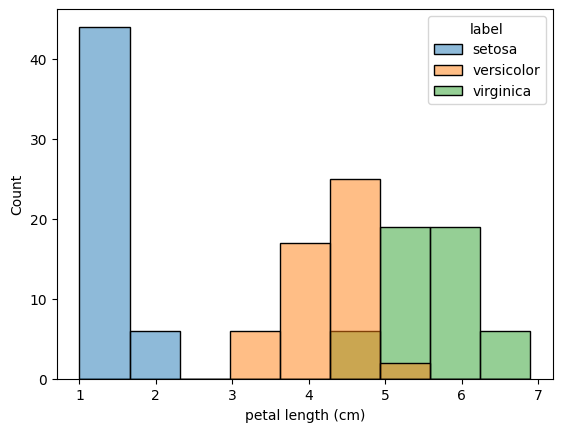

In [ ]:
# Petal Length is continuous data -> Use histogram graph for visualization
sns.histplot(data = df_iris, x = names[2], hue = "label")
plt.show()

Observation: Based on the graph distribution, data with petal length that is smaller than 2.xxx could be perfectly classified as setosa. There is a gap between 2.xxx and approximately 3, which non of the iris type could be classified as. Then it follows the distribution of versicolor, then virginica with overlaps

#### Relationship between Petal Width and Iris Type

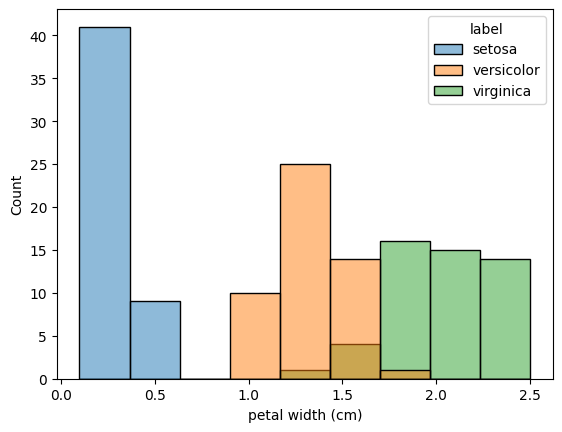

In [ ]:
# Petal Width is continuous data -> Use histogram graph for visualization
sns.histplot(data = df_iris, x = names[3], hue = "label")
plt.show()

Observation: Based on the graph distribution, data with petal width that is smaller than 0.6-0.7 could be perfectly classified as setosa. There is a gap between 0.6-0.7 and approximately 0.8-0.9, which non of the iris type could be classified as. Then it follows the distribution of versicolor, then virginica with overlaps

Result: After observing the relationship between Iris Type and Sepal Length, Sepal Width, Petal Length, and Petal Width, to classify the iris data, it would be the most appropriate to use petal length and petal width as setosa could be perfectly classified instantally

#### Relationship between Petal Length and Petal Width
* Would there be a correlation between Petal Length and Petal Width? If Petal Length increase, would also the Petal Width increase?

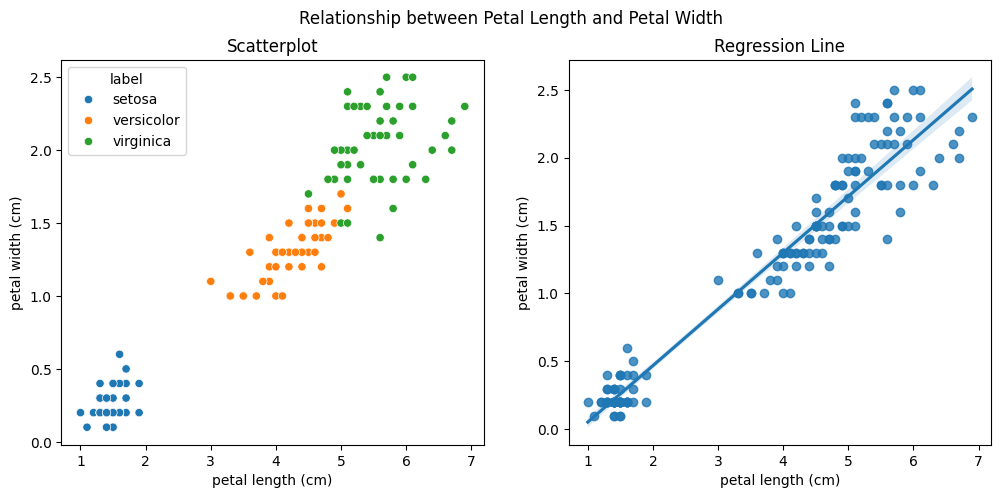

In [ ]:
### Scatterplot and Regression Line
fig, ax = plt.subplots(nrows = 1, ncols = 2)
fig.suptitle("Relationship between Petal Length and Petal Width")
ax[0].set_title("Scatterplot")
ax[1].set_title("Regression Line")
fig.set_size_inches((12, 5))
sns.scatterplot(data = df_iris, x = names[2], y = names[3], hue = "label", ax = ax[0])
sns.regplot(data = df_iris, x = names[2], y = names[3], ax = ax[1])
plt.show()

Observation: Based on the regression line, it could be shown how the petal length and petal width shows a positive correlation where petal width increases and petal length increases. Furthermore, by using the scatter plot, by deciding appropriate decision boundaries, the three iris could be appropriately classified into their approrpriate types.

## Data Modeling
* Applied algorithm: Decision Tree


### Preprocessing

Before doing modeling, the labels that indicates the type of the iris data will be preprocessed with encoding for effective modeling.

In [ ]:
# Extracting unique values for simplicity
arr = df_iris.loc[:, "label"].values
kinds = np.unique(ar = arr)       ## Extract the unique values in the label column in ascending alphabet order
print(f"Unique types of iris dataset: \n{kinds}")

print("-" * 80)

# Label Encoding
df_iris.loc[:, "label"] = df_iris.loc[:, "label"].replace({kinds[0] : 0,  ## Setosa => 0
                                                 kinds[1] : 1,  ## Versicolor => 1
                                                 kinds[2] : 2}) ## Virginica => 2

# Print Result
print(df_iris)

Unique types of iris dataset: 
[0 1 2]
--------------------------------------------------------------------------------
     sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                  5.1               3.5                1.4               0.2   
1                  4.9               3.0                1.4               0.2   
2                  4.7               3.2                1.3               0.2   
3                  4.6               3.1                1.5               0.2   
4                  5.0               3.6                1.4               0.2   
..                 ...               ...                ...               ...   
145                6.7               3.0                5.2               2.3   
146                6.3               2.5                5.0               1.9   
147                6.5               3.0                5.2               2.0   
148                6.2               3.4                5.4           

In [ ]:
## Check for column data types to see successful encoding conversion
df_iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   label              150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


As label column's data type is object, convert the data type to  int

In [ ]:
## Conersion

df_iris = df_iris.astype({"label" : "int"})

# result
df_iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   label              150 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 6.0 KB


### Datasets for Training Model
* Divide the dataset so that train : test = 80 : 20

In [ ]:
# Trainset

## Input feature set
X_data = df_iris.drop(columns = ["label"])
print(f"Input feature data: \n{X_data}")

print("-" * 80)

## Target set
y_data = df_iris.loc[:, "label"]
print(f"Target data : \n{y_data}")

print("-" * 80)

## Check for target data's distribution
ratio_target = y_data.value_counts(normalize = True)
print(f"Target data's distribution: \n{ratio_target}")

## Generate train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size = 0.2, random_state = 0, stratify = y_data)

Input feature data: 
     sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                  5.1               3.5                1.4               0.2
1                  4.9               3.0                1.4               0.2
2                  4.7               3.2                1.3               0.2
3                  4.6               3.1                1.5               0.2
4                  5.0               3.6                1.4               0.2
..                 ...               ...                ...               ...
145                6.7               3.0                5.2               2.3
146                6.3               2.5                5.0               1.9
147                6.5               3.0                5.2               2.0
148                6.2               3.4                5.4               2.3
149                5.9               3.0                5.1               1.8

[150 rows x 4 columns]
-------------------

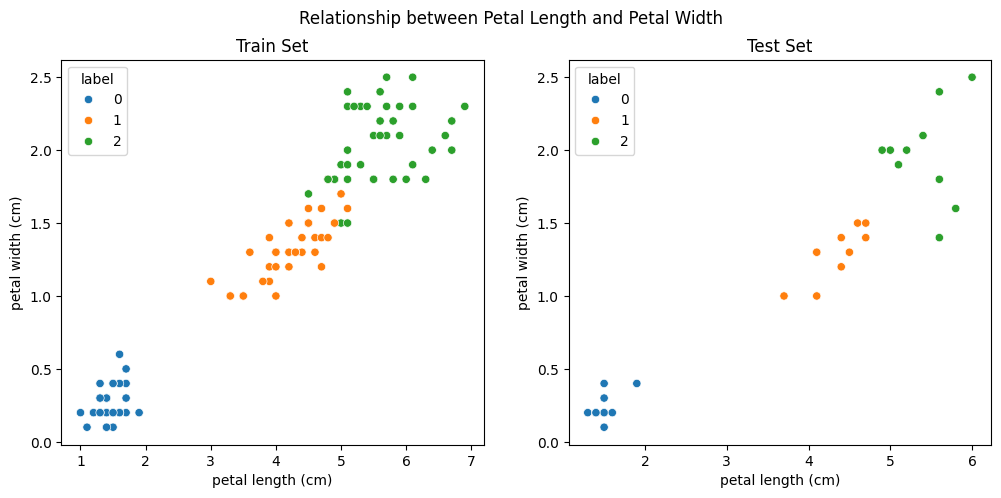

In [ ]:
## Training set and Test set visualization
df_train = pd.concat([X_train, y_train], axis = 1)  ## Train set
df_test = pd.concat([X_test, y_test], axis = 1)     ## Test set

## Plots
fig, ax = plt.subplots(nrows = 1, ncols = 2)
fig.suptitle("Relationship between Petal Length and Petal Width")
sns.scatterplot(data = df_train, x = names[2], y = names[3], hue = "label", palette = "tab10", ax = ax[0])
sns.scatterplot(data = df_test, x = names[2], y = names[3], hue = "label", palette = "tab10", ax = ax[1])
ax[0].set_title("Train Set")
ax[1].set_title("Test Set")
fig.set_size_inches((12, 5))
plt.show()

### Generate Decision Tree Model

In [ ]:
# Create Model
model_dt = DecisionTreeClassifier(random_state = 0)

# Train Model
model_dt.fit(X_train, y_train)

DecisionTreeClassifier(random_state=0)

### Decision Tree Visualization

In [ ]:
## Check for the tree's max depth
tree_depth = model_dt.get_depth()
print(f"Max depth of the tree : {tree_depth}")

Max depth of the tree : 4


As the max depth of the tree is 4, no hyperparameter tuning is needed.

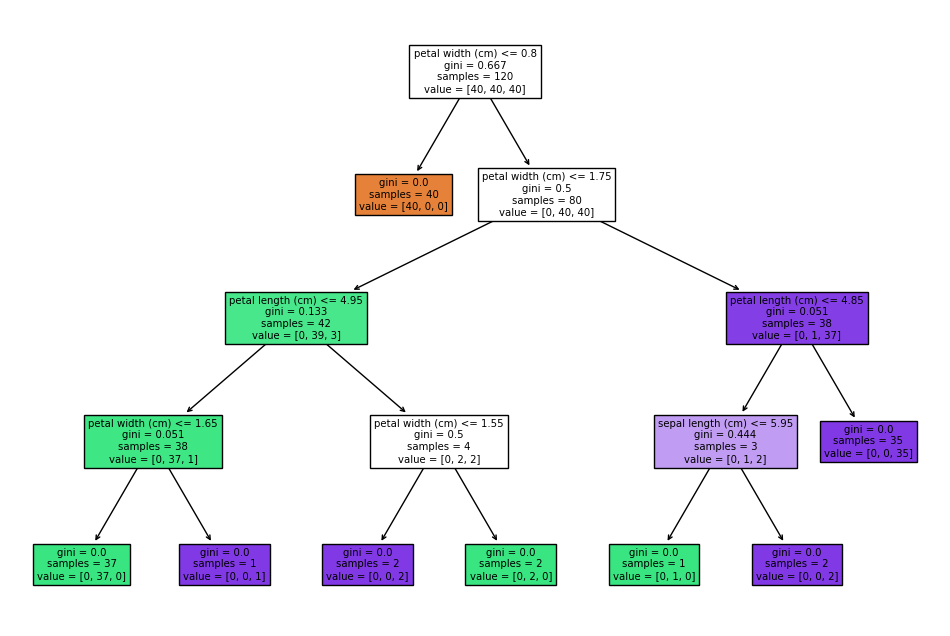

In [ ]:
## Draw the overall process for setting up tree's decision boundaries

plt.figure(figsize = (12, 8))  ## Adjust image size

plot_tree(decision_tree = model_dt, feature_names = X_train.columns, filled = True)
plt.show()

### Model Evaluation

In [ ]:
## Predictions using model
y_pred = model_dt.predict(X_test)
print(f"Predictions : \n{y_pred}")

Predictions : 
[0 1 0 2 0 1 2 0 0 1 2 1 1 2 1 2 2 1 1 0 0 2 2 1 0 1 1 2 0 0]


In [ ]:
# Evaluation of the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy of the model : {accuracy}")

Accuracy of the model : 0.9666666666666667


Evaluation: As this particular dataset is very straight-forward and small, the accuracy comes out as about 96.7% which verifies the model's accuracy of classifying the data into three categories based on their features. Thus, for more datasets with different input feature values, it is still estimated that it will be able to accurately classify them.